 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# **Reclutamiento de Empleados con Aprendizaje Automático | Colocación Laboral con Python | Sistema de Adquisición de Talento en RR.HH.**

En el mundo acelerado de hoy, las empresas buscan constantemente formas innovadoras para optimizar sus procesos, y la gestión de recursos humanos (RR.HH.) no es una excepción. Los métodos de reclutamiento tradicionales suelen ser consumidores de tiempo y carecen de la eficiencia necesaria para identificar a los mejores candidatos para el trabajo. Sin embargo, con los avances en aprendizaje automático y análisis de datos, los profesionales de RR.HH. ahora tienen herramientas poderosas a su disposición para revolucionar el proceso de reclutamiento.




## **Entendimiento del Proyecto:**
El proyecto está diseñado para aprovechar las técnicas de ML para predecir colocaciones laborales basadas en varios factores, como el rendimiento académico, la experiencia laboral, la especialización, y más.

Al analizar los datos históricos de empleados anteriores, el sistema busca identificar patrones y correlaciones que puedan predecir si un candidato es probable que sea colocado o no.

In [3]:
#pip install scikit-learn==1.4.2
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Placement_Data_Full_Class.csv")

In [6]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
# mostramos la estructura del dataframe : head

## **Diccionario**

1. **Sl_no**: Número de serie o identificador único para cada entrada o persona.
2. **gender**: Género del individuo.
3. **ssc_p**: Porcentaje obtenido en los exámenes de secundaria (SSC suele referirse a Secondary School Certificate).
4. **ssc_b**: Junta o comité organizador de los exámenes de secundaria.
5. **hsc_p**: Porcentaje obtenido en los exámenes de educación superior secundaria (HSC se refiere a Higher Secondary Certificate).
6. **hsc_b**: Junta o comité organizador de los exámenes de educación superior secundaria.
7. **hsc_s**: Especialización o área de estudio en la educación superior secundaria (ciencias, comercio, arte, etc.).
8. **degree_p**: Porcentaje obtenido en el grado universitario.
9. **degree_t**: Tipo de grado o campo de estudio en la educación universitaria (por ejemplo, tecnología, artes, comercio).
10. **workex**: Experiencia laboral (generalmente indicado como 'Yes' o 'No').
11. **etest_p**: Porcentaje obtenido en un examen de prueba, posiblemente un examen de empleabilidad o habilidades específicas.
12. **specialisation**: Especialización en estudios de posgrado, especialmente en programas de MBA.
13. **mba_p**: Porcentaje obtenido en el programa de MBA.
14. **status**: Estado del empleo o resultado del proceso de selección (como 'employed' o 'unemployed').
15. **salary**: Salario ofrecido o actual del individuo.



In [8]:
#Analizamos que variables no ayudan y lo eliminamos: ssc_b','hsc_b','hsc_s','degree_t','salary
#Código aquí
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [9]:
#eliminamos la columna id
columns_to_drop = ['ssc_b','hsc_b','hsc_s','degree_t','salary']
df = df.drop(columns_to_drop, axis=1)
df.head()


,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


observamos que no hay vacios

In [10]:
df['specialisation'].values

array(['Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin',
       'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin',
       'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
       'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin',
       'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin',
       'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR',
       'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR',
       'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin',
       'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR',
       'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
       'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR',
       'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
       'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin',
       'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
       'Mkt&

In [11]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

sl_no             0
gender            0
ssc_p             0
hsc_p             0
degree_p          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64


## Preprocessing

## Encoding

 Limpiar y preparar el conjunto de datos para el análisis. Esto incluye manejar valores faltantes, codificar variables categóricas y escalar características numéricas.

In [12]:
# codigica genero, experiencia de trabajo, estatus y especialización
# Puedes usar esta celda como punto de partida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   hsc_p           215 non-null    float64
 4   degree_p        215 non-null    float64
 5   workex          215 non-null    object 
 6   etest_p         215 non-null    float64
 7   specialisation  215 non-null    object 
 8   mba_p           215 non-null    float64
 9   status          215 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 16.9+ KB


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


columnas_categoricas = ['gender', 'workex', 'specialisation', 'status']  # Lista de columnas categóricas

# Aplicar LabelEncoder a las columnas categóricas
label_encoders = {}
for columna in columnas_categoricas:
    le = LabelEncoder()
    df[columna] = le.fit_transform(df[columna])
    label_encoders[columna] = le


# Balance Dataset


In [14]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [15]:
from sklearn.utils import resample

df_placed = df[df['status'] == 0]
df_not_placed = df[df['status'] == 1]

# Luego, realiza el resampling de la clase minoritaria (Not Placed) para igualar el número de muestras con la clase mayoritaria (Placed)
df_not_placed_resampled = df_not_placed.sample(n=len(df_placed), replace=True, random_state=42)

# Ahora que tienes ambos DataFrames con el mismo número de muestras, puedes combinarlos nuevamente
df_resampled = pd.concat([df_placed, df_not_placed_resampled])

In [16]:
df_resampled


,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
3,4,1,56.0,52.00,52.00,0,66.00,1,59.43,0
5,6,1,55.0,49.80,67.25,1,55.00,0,51.58,0
6,7,0,46.0,49.20,79.00,0,74.28,0,53.29,0
9,10,1,58.0,70.00,61.00,0,54.00,0,52.21,0
12,13,0,47.0,55.00,65.00,0,62.00,1,65.04,0
...,...,...,...,...,...,...,...,...,...,...
132,133,1,67.0,68.00,64.00,1,74.40,1,53.49,1
70,71,1,82.0,61.00,62.00,0,89.00,0,65.45,1
22,23,0,69.8,60.80,72.23,0,55.53,1,68.81,1
59,60,1,52.6,65.58,72.11,0,57.60,0,56.66,1


# Train Test Split

In [17]:
# Separación de feature y target
X = df_resampled.copy().drop('status', axis=1)
y = df_resampled['status']


In [18]:
#Train Test Split con test_size=0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

# 1 k-nearest neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

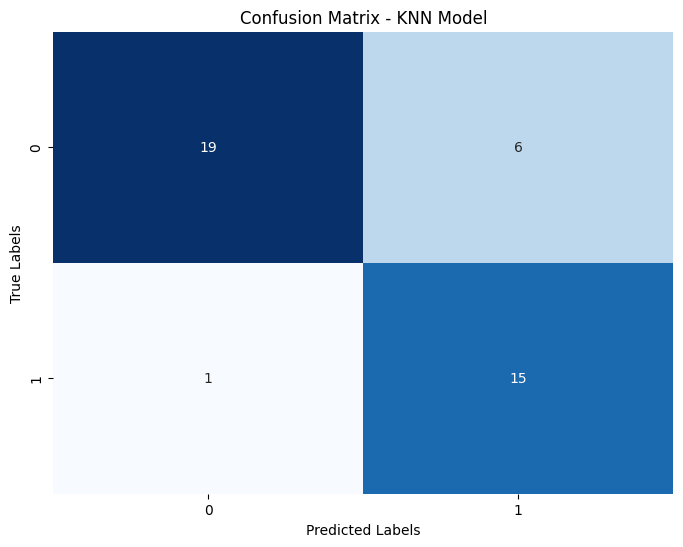

In [21]:
# Matriz de confusión heatmap KNN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = knn_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN Model')
plt.show()

# Decision Tree

In [22]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

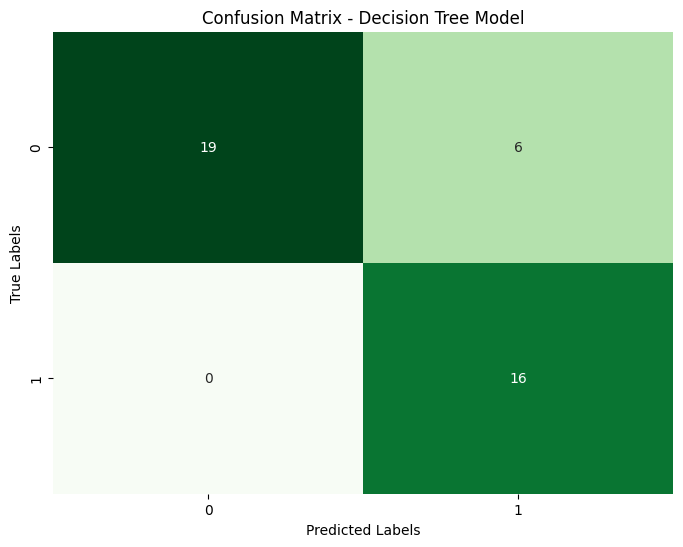

In [23]:
# creating confusion matrix heatmap (Decision Tree)

y_pred_dt = dt_model.predict(X_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()

# SVM

In [24]:
# Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)  # Puedes ajustar el kernel según tu preferencia
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

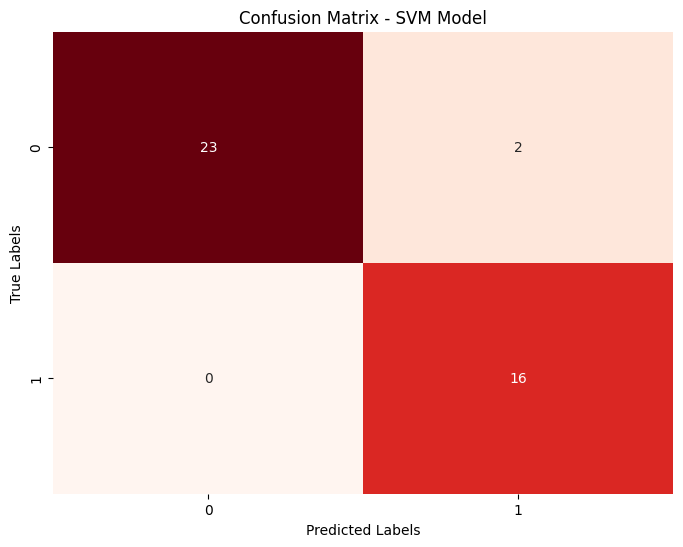

In [25]:
# creating confusion matrix heatmap SVM

y_pred_svm = svm_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Crear un heatmap para visualizar la matriz de confusión del SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Model')
plt.show()

# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Puedes ajustar n_estimators según tu preferencia
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

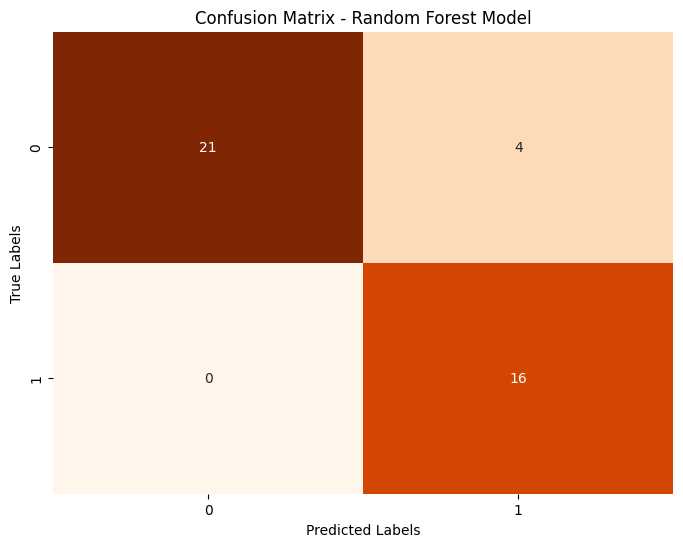

In [27]:
# creating confusion matrix heatmap - Random Forest

y_pred_rf = rf_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

# Gaussian Naive Bayes

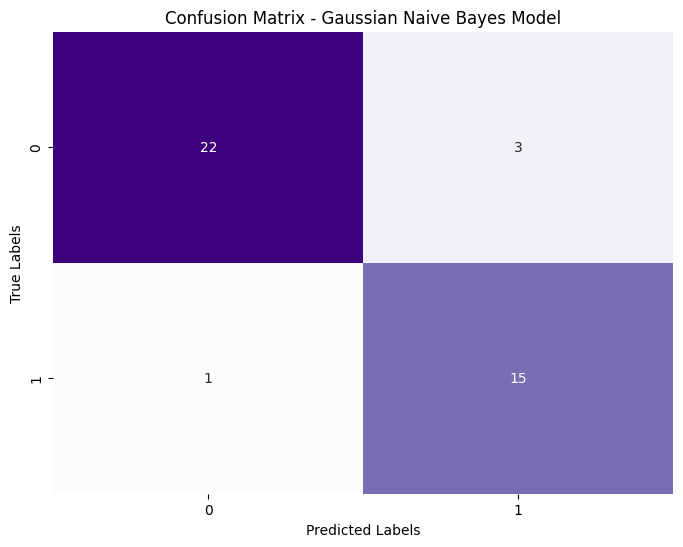

In [28]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gaussian Naive Bayes Model')
plt.show()

# Logistic Regression

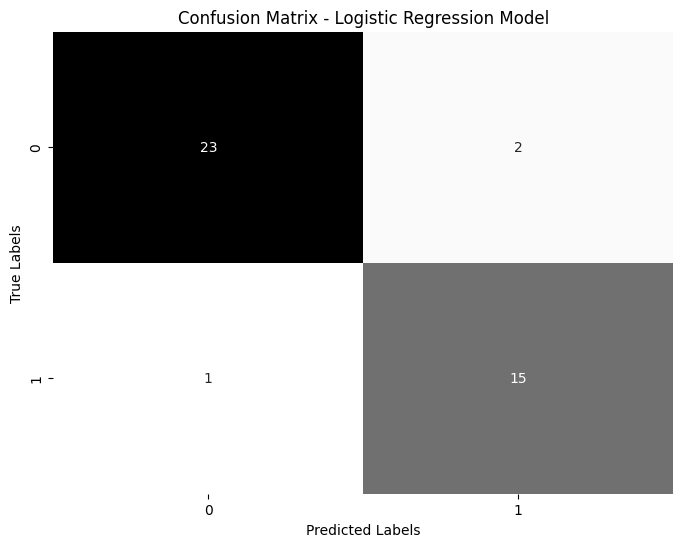

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)  # Puedes ajustar max_iter según sea necesario

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Obtener las predicciones del modelo sobre los datos de prueba
y_pred_logistic = logistic_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Crear un heatmap para visualizar la matriz de confusión de la Regresión Logística
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

## Single Input Predictions

Test si está prediciendo adecuadamente

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular las métricas para cada modelo
accuracy = [accuracy_score(y_test, y_pred),
            accuracy_score(y_test, y_pred_dt),
            accuracy_score(y_test, y_pred_svm),
            accuracy_score(y_test, y_pred_rf),
            accuracy_score(y_test, y_pred_nb),
            accuracy_score(y_test, y_pred_logistic)]

precision = [precision_score(y_test, y_pred),
             precision_score(y_test, y_pred_dt),
             precision_score(y_test, y_pred_svm),
             precision_score(y_test, y_pred_rf),
             precision_score(y_test, y_pred_nb),
             precision_score(y_test, y_pred_logistic)]

recall = [recall_score(y_test, y_pred),
          recall_score(y_test, y_pred_dt),
          recall_score(y_test, y_pred_svm),
          recall_score(y_test, y_pred_rf),
          recall_score(y_test, y_pred_nb),
          recall_score(y_test, y_pred_logistic)]

f1 = [f1_score(y_test, y_pred),
      f1_score(y_test, y_pred_dt),
      f1_score(y_test, y_pred_svm),
      f1_score(y_test, y_pred_rf),
      f1_score(y_test, y_pred_nb),
      f1_score(y_test, y_pred_logistic)]

# Organizar los resultados en una tabla
import pandas as pd

models = ["KNN", "Decision Tree", "SVM", "Random Forest", "Naive Bayes", "Logistic Regression"]

df_metrics = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
})

print(df_metrics)


                 Model  Accuracy  Precision  Recall  F1 Score
0                  KNN  0.829268   0.714286  0.9375  0.810811
1        Decision Tree  0.853659   0.727273  1.0000  0.842105
2                  SVM  0.951220   0.888889  1.0000  0.941176
3        Random Forest  0.902439   0.800000  1.0000  0.888889
4          Naive Bayes  0.902439   0.833333  0.9375  0.882353
5  Logistic Regression  0.926829   0.882353  0.9375  0.909091


# Sistema de Predicción

En base a las metricas utilizamos SVM

In [31]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    gender_encoded= label_encoders['gender'].transform([gender])[0]
    workex_encoded=label_encoders['workex'].transform([workex])[0]
    specialisation_encoded = label_encoders['specialisation'].transform([specialisation])[0]
    data = [[sl_no, gender_encoded, ssc_p, hsc_p, degree_p, workex_encoded, etest_p, specialisation_encoded, mba_p]]
    data_scaled = ms.transform(data)
    result = svm_model.predict(data_scaled)
    return result[0]


In [32]:
sl_no = 11
gender = "F"
ssc_p = 58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('Contratado')
else:
    print('No Contratado')

Contratado


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



Se emplea un modelo de Clasificador Random Forest para predecir las colocaciones laborales basadas en características de entrada como los puntajes académicos, la experiencia laboral y otros factores relevantes. El modelo se entrena con datos históricos para aprender patrones y hacer predicciones precisas.

# Guardar Archivos

In [33]:
import pickle

pickle.dump(svm_model,open('svm_model.pkl','wb'))
pickle.dump(label_encoders,open('label_encoders.pkl','wb'))
pickle.dump(ms,open('min_max_scaler.pkl','wb'))